In [126]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score
  
# fetch dataset 
fertility = fetch_ucirepo(id=244) 
  
# data (as pandas dataframes) 
X = fertility.data.features 
Y = fertility.data.targets 
  
# metadata 
print(fertility.metadata) 
  
# variable information 
print(fertility.variables) 


{'uci_id': 244, 'name': 'Fertility', 'repository_url': 'https://archive.ics.uci.edu/dataset/244/fertility', 'data_url': 'https://archive.ics.uci.edu/static/public/244/data.csv', 'abstract': '100 volunteers provide a semen sample analyzed according to the WHO 2010 criteria. Sperm concentration are related to socio-demographic data, environmental factors, health status, and life habits', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 100, 'num_features': 9, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['diagnosis'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5Z01Z', 'creators': ['David Gil', 'Jose Girela'], 'intro_paper': {'ID': 429, 'type': 'NATIVE', 'title': 'Predicting seminal quality with artificial intelligence methods', 'authors': 'David Gil, J. L. Girel

# Data Preprocessing

In [127]:

""" y[y['diagnosis'] == "N"] = 1 
y[y['diagnosis'] == "O"] = -1  """

#y.loc[:, 'diagnosis'] = y['diagnosis'].replace({'N': 1, 'O': -1})
#y = y.astype(float)

Y = (Y['diagnosis'] == 'N').astype(float)
Y[Y == 0] = -1

# Convert to numpy array and reshape to ensure it's a column vector
# y = y.values.reshape(-1, 1)

In [128]:
Y

0     1.0
1    -1.0
2     1.0
3     1.0
4    -1.0
     ... 
95    1.0
96    1.0
97    1.0
98    1.0
99    1.0
Name: diagnosis, Length: 100, dtype: float64

In [145]:
Y.shape

(176,)

In [129]:
print(np.unique(Y, return_counts=True))

(array([-1.,  1.]), array([12, 88]))


In [130]:

# Convert to numpy array and reshape to ensure it's a column vector

Y = Y.values.reshape(-1, 1)
#y = np.array(y)


In [131]:
Y

array([[ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
      

In [132]:
X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)  

print(Y.shape)
print(X.shape)
print(X_and_Y[0])

(100, 1)
(100, 9)
[-0.33  0.92  1.    1.    0.    1.    1.   -1.    0.63  1.  ]


In [133]:
unique_values = np.unique(Y)
print("Unique values in Y:", unique_values)
print(Y.dtype)  # Check the dtype if y is a NumPy array

Unique values in Y: [-1.  1.]
float64


In [134]:
print(np.unique(Y, return_counts=True))

(array([-1.,  1.]), array([12, 88]))


In [135]:
Y = Y.flatten()

In [136]:
Y.shape

(100,)

In [137]:
from imblearn.over_sampling import SMOTE

# Assuming X and Y are your features and target variable
smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(X, Y)

# Check the new class distribution
print("Original class distribution:", np.unique(Y, return_counts=True))
print("Resampled class distribution:", np.unique(Y, return_counts=True))

Original class distribution: (array([-1.,  1.]), array([88, 88]))
Resampled class distribution: (array([-1.,  1.]), array([88, 88]))


/Users/elizavetabeltyukova/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/elizavetabeltyukova/opt/anaconda3/envs/cogs118a/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [138]:
print(X.shape)
print(Y.shape)

(176, 9)
(176,)


# Decision Tree

## Hyperparameter search

In [139]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the parameter grid
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the decision tree classifier
estimator = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')

# Split 1: Train size = 20%, Test size = 80%
X_train_20, X_test_20, Y_train_20, Y_test_20 = train_test_split(X, Y, train_size=0.2, random_state=42, stratify=Y)
grid_search_20 = GridSearchCV(estimator, param_grid, cv=3, scoring="accuracy")
grid_search_20.fit(X_train_20, Y_train_20)
best_params_20 = grid_search_20.best_params_
cv_score_20 = grid_search_20.best_score_
additional_cv_score_20 = np.mean(cross_val_score(grid_search_20.best_estimator_, X_train_20, Y_train_20, cv=3))

print("Results for 20% training data:")
print("Best parameters:", best_params_20)
print(f"Cross-validated Accuracy (GridSearchCV): {cv_score_20:.4f}")
print(f"Additional Cross-validated Accuracy: {additional_cv_score_20:.4f}")
y_pred_20 = grid_search_20.best_estimator_.predict(X_test_20)
print("Classification Report:")
print(classification_report(Y_test_20, y_pred_20))

# Split 2: Train size = 50%, Test size = 50%
X_train_50, X_test_50, Y_train_50, Y_test_50 = train_test_split(X, Y, train_size=0.5, random_state=42, stratify=Y)
grid_search_50 = GridSearchCV(estimator, param_grid, cv=3, scoring="accuracy")
grid_search_50.fit(X_train_50, Y_train_50)
best_params_50 = grid_search_50.best_params_
cv_score_50 = grid_search_50.best_score_
additional_cv_score_50 = np.mean(cross_val_score(grid_search_50.best_estimator_, X_train_50, Y_train_50, cv=3))

print("\nResults for 50% training data:")
print("Best parameters:", best_params_50)
print(f"Cross-validated Accuracy (GridSearchCV): {cv_score_50:.4f}")
print(f"Additional Cross-validated Accuracy: {additional_cv_score_50:.4f}")
y_pred_50 = grid_search_50.best_estimator_.predict(X_test_50)
print("Classification Report:")
print(classification_report(Y_test_50, y_pred_50))

# Split 3: Train size = 80%, Test size = 20%
X_train_80, X_test_80, Y_train_80, Y_test_80 = train_test_split(X, Y, train_size=0.8, random_state=42, stratify=Y)
grid_search_80 = GridSearchCV(estimator, param_grid, cv=3, scoring="accuracy")
grid_search_80.fit(X_train_80, Y_train_80)
best_params_80 = grid_search_80.best_params_
cv_score_80 = grid_search_80.best_score_
additional_cv_score_80 = np.mean(cross_val_score(grid_search_80.best_estimator_, X_train_80, Y_train_80, cv=3))

print("\nResults for 80% training data:")
print("Best parameters:", best_params_80)
print(f"Cross-validated Accuracy (GridSearchCV): {cv_score_80:.4f}")
print(f"Additional Cross-validated Accuracy: {additional_cv_score_80:.4f}")
y_pred_80 = grid_search_80.best_estimator_.predict(X_test_80)
print("Classification Report:")
print(classification_report(Y_test_80, y_pred_80))


Results for 20% training data:
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-validated Accuracy (GridSearchCV): 0.8333
Additional Cross-validated Accuracy: 0.7727
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.81      0.85      0.83        71
         1.0       0.84      0.80      0.82        70

    accuracy                           0.82       141
   macro avg       0.82      0.82      0.82       141
weighted avg       0.82      0.82      0.82       141


Results for 50% training data:
Best parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-validated Accuracy (GridSearchCV): 0.8410
Additional Cross-validated Accuracy: 0.8410
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.85      0.75      0.80        44
         1.0       0.78      0.86      0.82        44

    accuracy                           0.81        88


### implementing DT for 20/80 split

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Assume best_params_20 is already defined from previous GridSearchCV

accuracies_20 = []

for trial in range(3):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, random_state=None, shuffle=True)
    
    # Create the classifier with best_params_20
    best_model = DecisionTreeClassifier(criterion='entropy', **best_params_20)
    
    # Fit the model
    best_model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies_20.append(accuracy)
    
    print(f"\nTrial {trial + 1} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(Y_test, y_pred, zero_division=0))

average_accuracy = np.mean(accuracies_20)
print(f"\nAverage Accuracy over 3 trials: {average_accuracy:.4f}")



Trial 1 Results:
Accuracy: 0.7163
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.73      0.67      0.70        70
         1.0       0.70      0.76      0.73        71

    accuracy                           0.72       141
   macro avg       0.72      0.72      0.72       141
weighted avg       0.72      0.72      0.72       141


Trial 2 Results:
Accuracy: 0.7376
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.68      0.88      0.77        69
         1.0       0.84      0.60      0.70        72

    accuracy                           0.74       141
   macro avg       0.76      0.74      0.73       141
weighted avg       0.76      0.74      0.73       141


Trial 3 Results:
Accuracy: 0.7234
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.77      0.67      0.72        73
         1.0       0.69      0.78      0.73        68

    accu

### Implementing DT for 50/50

In [141]:
accuracies_50 = []

for trial in range(3):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=None, shuffle=True)
    
    # Create the classifier with best_params_20
    best_model = DecisionTreeClassifier(criterion='entropy', **best_params_50)
    
    # Fit the model
    best_model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies_50.append(accuracy)
    
    print(f"\nTrial {trial + 1} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))

average_accuracy = np.mean(accuracies_50)
print(f"\nAverage Accuracy over 3 trials: {average_accuracy:.4f}")


Trial 1 Results:
Accuracy: 0.8409
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.82      0.89      0.85        46
         1.0       0.87      0.79      0.82        42

    accuracy                           0.84        88
   macro avg       0.84      0.84      0.84        88
weighted avg       0.84      0.84      0.84        88


Trial 2 Results:
Accuracy: 0.7500
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.74      0.70      0.72        40
         1.0       0.76      0.79      0.78        48

    accuracy                           0.75        88
   macro avg       0.75      0.75      0.75        88
weighted avg       0.75      0.75      0.75        88


Trial 3 Results:
Accuracy: 0.8295
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.78      0.93      0.85        46
         1.0       0.91      0.71      0.80        42

    accu

## implementing DT for 80/20

In [143]:

accuracies_80 = []

for trial in range(3):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=None, shuffle=True)
    
    # Create the classifier with best_params_20
    best_model = DecisionTreeClassifier(criterion='entropy', **best_params_80)
    
    # Fit the model
    best_model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies_80.append(accuracy)
    
    print(f"\nTrial {trial + 1} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))

average_accuracy = np.mean(accuracies_80)
print(f"\nAverage Accuracy over 3 trials: {average_accuracy:.4f}")



Trial 1 Results:
Accuracy: 0.9167
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.88      1.00      0.94        23
         1.0       1.00      0.77      0.87        13

    accuracy                           0.92        36
   macro avg       0.94      0.88      0.90        36
weighted avg       0.93      0.92      0.91        36


Trial 2 Results:
Accuracy: 0.8056
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.80      0.75      0.77        16
         1.0       0.81      0.85      0.83        20

    accuracy                           0.81        36
   macro avg       0.80      0.80      0.80        36
weighted avg       0.81      0.81      0.80        36


Trial 3 Results:
Accuracy: 0.8889
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.88      0.96      0.92        23
         1.0       0.91      0.77      0.83        13

    accu

## KNN

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy
from matplotlib.colors import ListedColormap
from functools import partial

In [109]:
X_and_Y.shape
X_and_Y[:,9]

array([ 1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [110]:
X_shuffled = X_and_Y[:,:9]
Y_shuffled = X_and_Y[:,9]

""" X_train = X_shuffled[:60]
Y_train = Y_shuffled[:60]
X_test = X_shuffled[200:]
Y_test = Y_shuffled[200:]"""
print(X_shuffled.shape)
print(Y_shuffled.shape)
print(X.shape)
print(Y.shape)

(100, 9)
(100,)
(176, 9)
(176,)


## test parameters for 20/80

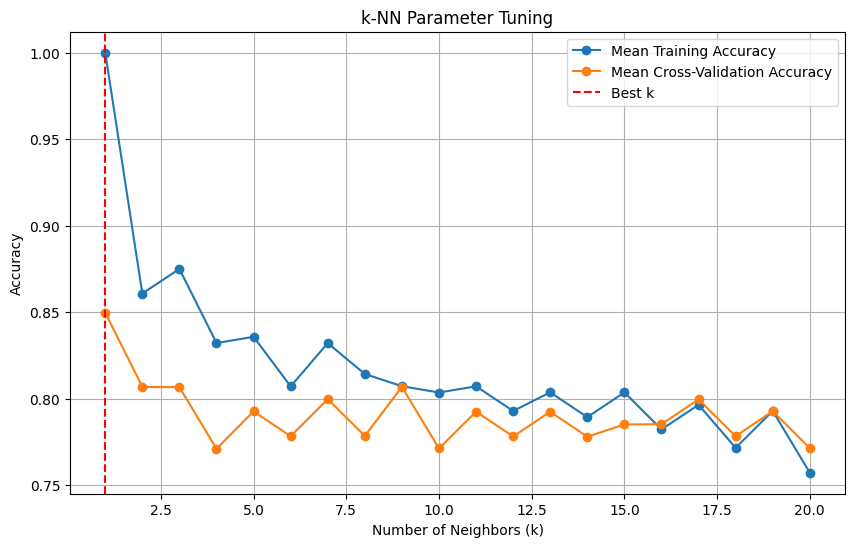

Best parameters: {'n_neighbors': np.int64(1)}
Best cross-validation score: 0.8496762257169288
Test accuracy with best parameters: 0.6944444444444444


In [123]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Assuming X and Y are your feature matrix and target vector
# Example data (replace with your actual data)
# X = np.array(...)  # Your feature data
# Y = np.array(...)  # Your target data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 27)}  # Testing k values from 1 to 20

# Create a k-NN classifier
knn = KNeighborsClassifier()\

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_train_scores, label='Mean Training Accuracy', marker='o')
plt.plot(k_values, mean_test_scores, label='Mean Cross-Validation Accuracy', marker='o')
plt.axvline(grid_search.best_params_['n_neighbors'], color='r', linestyle='--', label='Best k')
plt.title('k-NN Parameter Tuning')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate on the test set using the best model
best_knn = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_knn.predict(X_test))
print("Test accuracy with best parameters:", test_accuracy)

## implement 20/80 split KNN

In [ ]:
# Assuming X, Y, and best_params are defined

# Initialize variables for storing results
accuracies = []
confusion_matrices = []
classification_reports = []

# Perform 3 trials
for trial in range(3):
    print(f"Trial {trial + 1}")

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=None, train_size=0.2, shuffle=True)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)  # Use transform, not fit_transform, for test data

    # Train the KNN classifier
    knn = KNeighborsClassifier(**best_params)
    knn.fit(X_train, Y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate and save accuracy
    accuracy = knn.score(X_test, Y_test)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy}")

    # Calculate and save confusion matrix and classification report
    cm = confusion_matrix(Y_test, y_pred)
    confusion_matrices.append(cm)
    print(f"Confusion Matrix:\n{cm}")

    cr = classification_report(Y_test, y_pred)
    classification_reports.append(cr)
    print(f"Classification Report:\n{cr}")

# Calculate the average accuracy
average_accuracy_1 = np.mean(accuracies)
print("\nFinal Report")
print(f"Average Accuracy: {average_accuracy_1}")


Trial 1
Accuracy: 0.8085106382978723
Confusion Matrix:
[[60 14]
 [13 54]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.82      0.81      0.82        74
         1.0       0.79      0.81      0.80        67

    accuracy                           0.81       141
   macro avg       0.81      0.81      0.81       141
weighted avg       0.81      0.81      0.81       141

Trial 2
Accuracy: 0.75177304964539
Confusion Matrix:
[[56 21]
 [14 50]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.80      0.73      0.76        77
         1.0       0.70      0.78      0.74        64

    accuracy                           0.75       141
   macro avg       0.75      0.75      0.75       141
weighted avg       0.76      0.75      0.75       141

Trial 3
Accuracy: 0.7730496453900709
Confusion Matrix:
[[63  8]
 [24 46]]
Classification Report:
              precision    recall  f1-score   support

  

## test parameters for 50/50

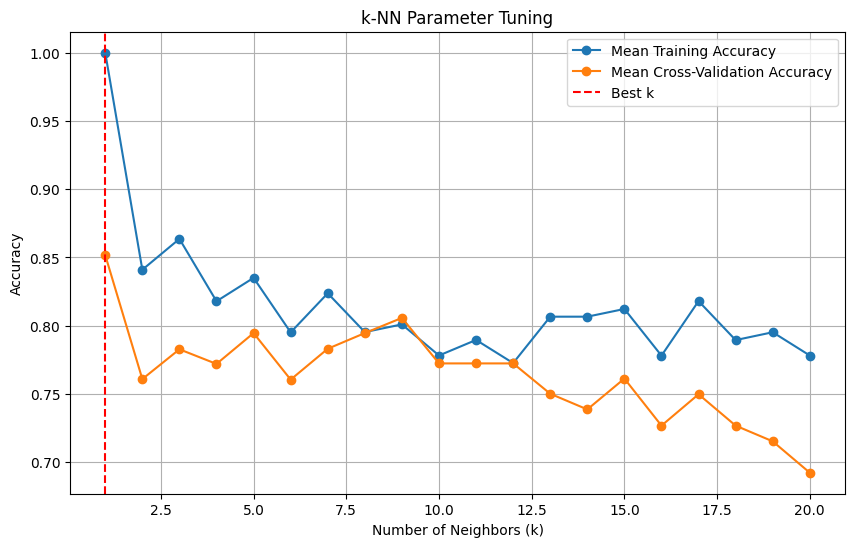

Best parameters: {'n_neighbors': np.int64(1)}
Best cross-validation score: 0.8517241379310345
Test accuracy with best parameters: 0.7727272727272727


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}  # Testing k values from 1 to 20

# Create a k-NN classifier
knn = KNeighborsClassifier()\

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Visualize the results
results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_train_scores = results['mean_train_score']
mean_test_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_train_scores, label='Mean Training Accuracy', marker='o')
plt.plot(k_values, mean_test_scores, label='Mean Cross-Validation Accuracy', marker='o')
plt.axvline(grid_search.best_params_['n_neighbors'], color='r', linestyle='--', label='Best k')
plt.title('k-NN Parameter Tuning')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate on the test set using the best model
best_knn = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_knn.predict(X_test))
print("Test accuracy with best parameters:", test_accuracy)

## implementing KNN for 50/50

In [ ]:


# Initialize variables for storing results
accuracies = []
confusion_matrices = []
classification_reports = []

# Perform 3 trials
for trial in range(3):
    print(f"Trial {trial + 1}")

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=None, train_size=0.5, shuffle=True)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)  # Use transform, not fit_transform, for test data

    # Train the KNN classifier
    knn = KNeighborsClassifier(**best_params)
    knn.fit(X_train, Y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate and save accuracy
    accuracy = knn.score(X_test, Y_test)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy}")

    # Calculate and save confusion matrix and classification report
    cm = confusion_matrix(Y_test, y_pred)
    confusion_matrices.append(cm)
    print(f"Confusion Matrix:\n{cm}")

    cr = classification_report(Y_test, y_pred)
    classification_reports.append(cr)
    print(f"Classification Report:\n{cr}")

# Calculate the average accuracy
average_accuracy_2 = np.mean(accuracies)
print("\nFinal Report")
print(f"Average Accuracy: {average_accuracy_2}")


Trial 1
Accuracy: 0.8409090909090909
Confusion Matrix:
[[36  8]
 [ 6 38]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.86      0.82      0.84        44
         1.0       0.83      0.86      0.84        44

    accuracy                           0.84        88
   macro avg       0.84      0.84      0.84        88
weighted avg       0.84      0.84      0.84        88

Trial 2
Accuracy: 0.8295454545454546
Confusion Matrix:
[[42  1]
 [14 31]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.75      0.98      0.85        43
         1.0       0.97      0.69      0.81        45

    accuracy                           0.83        88
   macro avg       0.86      0.83      0.83        88
weighted avg       0.86      0.83      0.83        88

Trial 3
Accuracy: 0.8636363636363636
Confusion Matrix:
[[37  4]
 [ 8 39]]
Classification Report:
              precision    recall  f1-score   support



## test parameters for 80/20

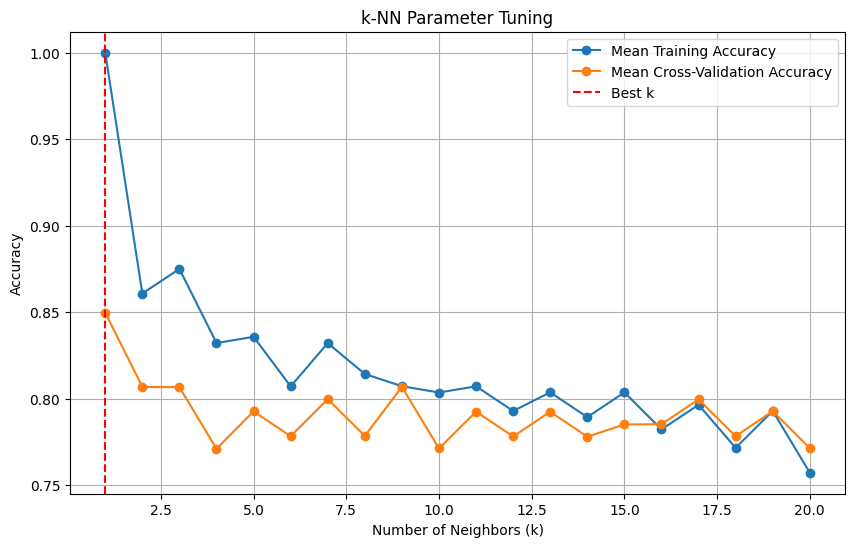

Best parameters: {'n_neighbors': np.int64(1)}
Best cross-validation score: 0.8496762257169288
Test accuracy with best parameters: 0.6944444444444444


In [115]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}  # Testing k values from 1 to 20

# Create a k-NN classifier
knn = KNeighborsClassifier()\

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Visualize the results
results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_train_scores = results['mean_train_score']
mean_test_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_train_scores, label='Mean Training Accuracy', marker='o')
plt.plot(k_values, mean_test_scores, label='Mean Cross-Validation Accuracy', marker='o')
plt.axvline(grid_search.best_params_['n_neighbors'], color='r', linestyle='--', label='Best k')
plt.title('k-NN Parameter Tuning')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate on the test set using the best model
best_knn = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_knn.predict(X_test))
print("Test accuracy with best parameters:", test_accuracy)

# implementing 80/20 KNN

In [ ]:
# Assuming X, Y, and best_params are defined

# Initialize variables for storing results
accuracies = []
confusion_matrices = []
classification_reports = []

# Perform 3 trials
for trial in range(3):
    print(f"Trial {trial + 1}")

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=None, train_size=0.8, shuffle=True)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)  # Use transform, not fit_transform, for test data

    # Train the KNN classifier
    knn = KNeighborsClassifier(**best_params)
    knn.fit(X_train, Y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate and save accuracy
    accuracy = knn.score(X_test, Y_test)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy}")

    # Calculate and save confusion matrix and classification report
    cm = confusion_matrix(Y_test, y_pred)
    confusion_matrices.append(cm)
    print(f"Confusion Matrix:\n{cm}")

    cr = classification_report(Y_test, y_pred)
    classification_reports.append(cr)
    print(f"Classification Report:\n{cr}")

# Calculate the average accuracy
average_accuracy_3 = np.mean(accuracies)
print("\nFinal Report")
print(f"Average Accuracy: {average_accuracy_3}")


Trial 1
Accuracy: 0.8888888888888888
Confusion Matrix:
[[17  1]
 [ 3 15]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.85      0.94      0.89        18
         1.0       0.94      0.83      0.88        18

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36

Trial 2
Accuracy: 0.8888888888888888
Confusion Matrix:
[[19  3]
 [ 1 13]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.86      0.90        22
         1.0       0.81      0.93      0.87        14

    accuracy                           0.89        36
   macro avg       0.88      0.90      0.89        36
weighted avg       0.90      0.89      0.89        36

Trial 3
Accuracy: 0.8611111111111112
Confusion Matrix:
[[13  1]
 [ 4 18]]
Classification Report:
              precision    recall  f1-score   support



## Random Forest

### parameter training

In [117]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming X, Y are defined

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'max_features': [1, 8, 20]
}

# Find best parameters for each split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, Y, train_size=0.2, random_state=42)
grid_search_20 = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search_20.fit(X_train_20, y_train_20)
best_params_20 = grid_search_20.best_params_

X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, Y, train_size=0.5, random_state=42)
grid_search_50 = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search_50.fit(X_train_50, y_train_50)
best_params_50 = grid_search_50.best_params_

X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, Y, train_size=0.8, random_state=42)
grid_search_80 = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search_80.fit(X_train_80, y_train_80)
best_params_80 = grid_search_80.best_params_

# Visualization of hyperparameter tuning
results_20 = grid_search_20.cv_results_
results_50 = grid_search_50.cv_results_
results_80 = grid_search_80.cv_results_

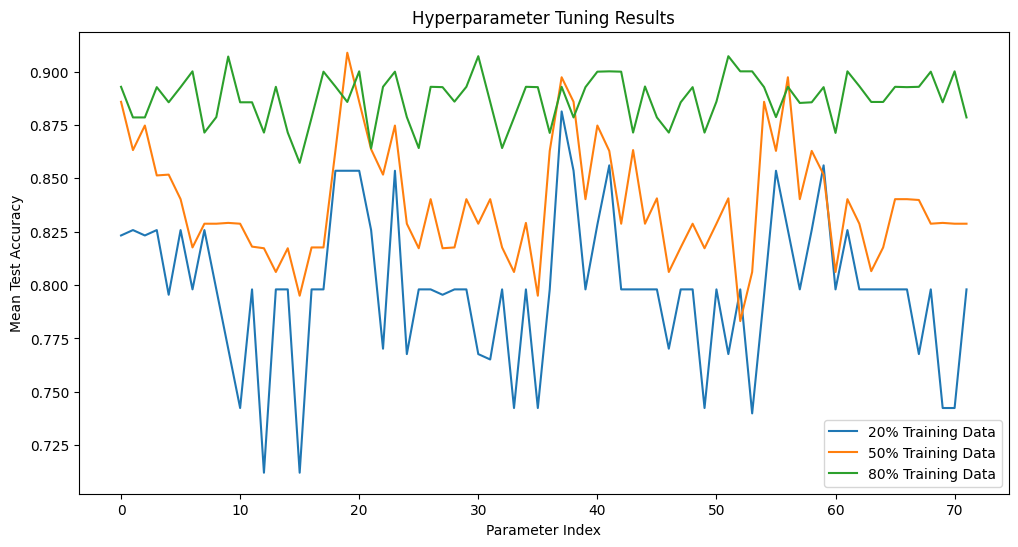

In [118]:
plt.figure(figsize=(12, 6))
plt.plot(results_20['mean_test_score'], label='20% Training Data')
plt.plot(results_50['mean_test_score'], label='50% Training Data')
plt.plot(results_80['mean_test_score'], label='80% Training Data')
plt.xlabel('Parameter Index')
plt.ylabel('Mean Test Accuracy')
plt.title('Hyperparameter Tuning Results')
plt.legend()
plt.show()

## implementing 20/80 RF

In [119]:
# Code block for 20% split
print("20% Training Data")
accuracies_20 = []
for trial in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.2, random_state=None, shuffle=True)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    rf = RandomForestClassifier(**best_params_20)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_20.append(accuracy)
    print(f"Trial {trial + 1} Accuracy: {accuracy}")
    print(f"Classification Report for Trial {trial + 1}: {classification_report(y_test, y_pred, zero_division=0)}")
print(f"Average Accuracy for 20% Training Data: {np.mean(accuracies_20)}\n")



20% Training Data
Trial 1 Accuracy: 0.8014184397163121
Classification Report for Trial 1:               precision    recall  f1-score   support

        -1.0       0.72      0.92      0.81        65
         1.0       0.91      0.70      0.79        76

    accuracy                           0.80       141
   macro avg       0.82      0.81      0.80       141
weighted avg       0.83      0.80      0.80       141

Trial 2 Accuracy: 0.9219858156028369
Classification Report for Trial 2:               precision    recall  f1-score   support

        -1.0       0.91      0.93      0.92        69
         1.0       0.93      0.92      0.92        72

    accuracy                           0.92       141
   macro avg       0.92      0.92      0.92       141
weighted avg       0.92      0.92      0.92       141

Trial 3 Accuracy: 0.8865248226950354
Classification Report for Trial 3:               precision    recall  f1-score   support

        -1.0       0.91      0.86      0.89        72
   

In [120]:
Y.shape

(176,)

## implementing 50/50 RF

In [121]:
# Code block for 50% split
print("50% Training Data")
accuracies_50 = []
for trial in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, random_state=None, shuffle=True)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    rf = RandomForestClassifier(**best_params_50)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_50.append(accuracy)
    print(f"Trial {trial + 1} Accuracy: {accuracy}")
    print(f"Classification Report for Trial {trial + 1}: {classification_report(y_test, y_pred, zero_division=0)}")
print(f"Average Accuracy for 50% Training Data: {np.mean(accuracies_50)}\n")

50% Training Data
Trial 1 Accuracy: 0.9090909090909091
Classification Report for Trial 1:               precision    recall  f1-score   support

        -1.0       0.90      0.93      0.91        46
         1.0       0.93      0.88      0.90        42

    accuracy                           0.91        88
   macro avg       0.91      0.91      0.91        88
weighted avg       0.91      0.91      0.91        88

Trial 2 Accuracy: 0.8636363636363636
Classification Report for Trial 2:               precision    recall  f1-score   support

        -1.0       0.85      0.92      0.88        48
         1.0       0.89      0.80      0.84        40

    accuracy                           0.86        88
   macro avg       0.87      0.86      0.86        88
weighted avg       0.87      0.86      0.86        88

Trial 3 Accuracy: 0.8863636363636364
Classification Report for Trial 3:               precision    recall  f1-score   support

        -1.0       0.89      0.89      0.89        46
   

## implementing 80/20 RF

In [144]:
# Code block for 80% split
print("80% Training Data")
accuracies_80 = []
for trial in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=None, shuffle=True)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    rf = RandomForestClassifier(**best_params_80)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_80.append(accuracy)
    print(f"Trial {trial + 1} Accuracy: {accuracy}")
    print(f"Classification Report for Trial {trial + 1}:{classification_report(y_test, y_pred, zero_division=0)}")
print(f"Average Accuracy for 80% Training Data: {np.mean(accuracies_80)}\n")

80% Training Data
Trial 1 Accuracy: 0.9722222222222222
Classification Report for Trial 1:              precision    recall  f1-score   support

        -1.0       1.00      0.94      0.97        18
         1.0       0.95      1.00      0.97        18

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

Trial 2 Accuracy: 0.9444444444444444
Classification Report for Trial 2:              precision    recall  f1-score   support

        -1.0       1.00      0.91      0.95        22
         1.0       0.88      1.00      0.93        14

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

Trial 3 Accuracy: 0.9166666666666666
Classification Report for Trial 3:              precision    recall  f1-score   support

        -1.0       0.91      0.95      0.93        21
      